# Load

In [1]:
%matplotlib inline

In [38]:
import numpy as np
import scipy as sp
from scipy import integrate

import matplotlib.pyplot as plt

In [45]:
import importlib
ch = importlib.import_module('control_helper')

In [68]:
ch = importlib.reload(ch)

# Dynamics

Solve the Hamilton equations of motion for the state variable X of the cartpole system to find the 1st order equation of motion $\dot{X} = f(X,t)$:

\begin{align*}
    \dot{x}        &= \frac{- ml \cos(\theta) p_\theta + ml^2 p_x }{D(\theta)} \\
    \dot{p_x}      &= 0 \\
    \dot{\theta}   &= \frac{ (M+m) p_\theta - ml \cos(\theta) p_x }{D(\theta)} \\
    \dot{p_\theta} &= - \frac{1}{2} \big((M+m) p_\theta^2 + ml^2 p_x^2 - 2 m l \cos(\theta) p_x p_\theta \big)
                      G(\theta) + m g l \sin(\theta)
\end{align*}

with 
$D(\theta) = ml^2 (M + m \sin^2(\theta) )$,
$G(\theta) =  \frac{\partial}{ \partial \theta} \frac{1}{D(\theta)} = - \frac{2 m^2 l^2 \sin(\theta) \cos(\theta)}{ D(\theta)^2 }$

Use ode45 to time-evolve the dynamical system, and make a movie of the result.

Comments:
- should I write everything in terms of mass ratios?
- need to go back and add friction
- choice of units?

In [121]:
# c = ch.cartpole({'mass_cart': 5, 'mass_pole': 2, 'length_pole': .75})
c = ch.cartpole({'mass_cart': 5, 'mass_pole': 2.1, 'length_pole': .75})

In [122]:
y0 = [0, 1, 0, 0]
tmin, tmax = [0,8.5]
time = np.linspace(tmin,tmax,int((tmax-tmin)/.01))
res = integrate.solve_ivp(c.rhs, [tmin, tmax], y0, t_eval=time)

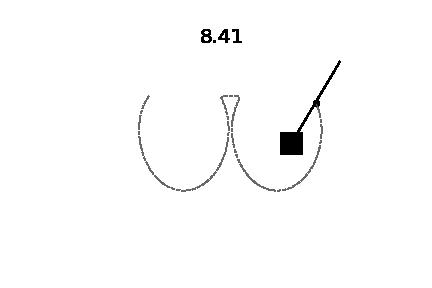

In [123]:
xmin,xmax = [min(res.y[0,:])-2*c.l, max(res.y[0,:])+2*c.l]
ymin,ymax = [-2*c.l, 2*c.l]
for i,t in enumerate(time):
    if i%10==0:
        fig, ax = plt.subplots(1)
        ax.set_xlim([xmin,xmax])
        ax.set_ylim([ymin,ymax])
        ax.set_aspect('equal')

        # Plot data
        cm_pole = [res.y[0,i]+c.l*np.sin(res.y[2,i]), c.l*np.cos(res.y[2,i])]
        ax.plot(res.y[0,:i]+c.l*np.sin(res.y[2,:i]), c.l*np.cos(res.y[2,:i]), ls='--', lw=1)
        cm_cart = [res.y[0,i], 0]
        ax.set_title(str(round(t, 2)), fontsize=20)
        ax.plot([cm_cart[0], 2*(cm_pole[0]-cm_cart[0])+cm_cart[0]], [cm_cart[1], 2*cm_pole[1]], c='k')
        ax.scatter(*cm_pole, marker='o', c='k')
        ax.scatter(*cm_cart, marker='s', s=500, c='k')
        ax.axis('off')
        
        plt.close() # prevent print
        ch.DisplayFigure(fig)

# Controllability

Compute the Jacobian:

$J = $
\begin{pmatrix} 
0 & \frac{ml^2}{D(\theta)} 
  & (-ml\cos(\theta) p_\theta + ml^2 p_x) G(\theta) + \frac{ml\sin(\theta)p_\theta}{D(\theta)} 
  & \frac{-ml\cos(\theta)}{D(\theta)}\\
0 & 0 & 0 & 0 \\
0 & \frac{-ml\cos(\theta)}{D(\theta)}
  & \big( (M+m) p_\theta - ml \cos(\theta) p_x \big) G(\theta) +  \frac{ ml \sin(\theta) p_x }{D(\theta)}
  & \frac{M+m}{D(\theta)} \\
0 & - \frac{1}{2} \big(2 ml^2 p_x - 2 m l \cos(\theta) p_\theta \big) G(\theta)
  & - \frac{1}{2} \big((M+m) p_\theta^2 + ml^2 p_x^2 - 2 m l \cos(\theta) p_x p_\theta \big)
      \frac{\partial  G(\theta)}{\partial \theta}
      - \frac{1}{2} \big(2 m l \sin(\theta) p_x p_\theta \big) G(\theta)
      + m g l \cos(\theta) 
  & - \frac{1}{2} \big(2 (M+m) p_\theta - 2 m l \cos(\theta) p_x \big) G(\theta) \\
\end{pmatrix}

Then we evaluate at the points we are expanding about--that's $\theta = 0, \pi$ and all the other values can be anything. 

Note:

$D(\theta=0, \pi) = M m l^2 $,

$G(\theta=0, \pi) =  0$,

$ \frac{\partial  G(\theta)}{\partial \theta}|_{0, \pi} \
  = \frac{D_{\theta \theta}}{D^3(\theta)} G(\theta)|_{0, \pi} = 0$

Hence:

$J|_{0, \pi} = $
\begin{pmatrix} 
0 & \frac{1}{ M } 
  & 0 
  & \frac{-s}{M l }\\
0 & 0 
  & 0 
  & 0 \\
0 & \frac{-s}{M l }
  & 0
  & \frac{M+m}{M m l^2 } \\
0 & 0
  & m g l s
  & 0 \\
\end{pmatrix}

where s holds the sign of $\cos(0), \cos(\pi)$.

Comments:
- it's odd that there's no dendence on any of the other variables at these angles
- can I check some cases to see if this makes sense?

In [ ]:
# Check for controllability by looking at the rank of the controllability matri
# Look at the SVD and interpretx

In [2]:
# Check the behavior of placing eigenvalues deeper into the negative half-plane

In [ ]:
# Run the lqr for choice of Q and R to find the optimal regulator
# Look at the eigenvalues to learn what optimal control is doing
# Should see that xdot and thetadot are VERY controllable.

# Observability

In [ ]:
# Choose a sensor (let's say the position, x)
# Construct the observability matrix and check for observability
# Look at the SVD and interpret

In [ ]:
# Is there an observable subsystem? Omit x.